In [1]:
import numpy as np
import os


In [2]:
from __future__ import print_function
import os
from io import BytesIO
import numpy as np
from functools import partial
import PIL.Image
from IPython.display import clear_output, Image, display, HTML
# Picking some internal layer. Note that we use outputs before applying the ReLU nonlinearity
# to have non-zero gradients for features with negative initial activations.
layer = 'mixed4d_3x3_bottleneck_pre_relu'
channel = 139 # picking some feature channel to visualize

# start with a gray image with a little noise
img_noise = np.random.uniform(size=(224,224,3)) + 100.0

def showarray(a, fmt='jpeg'):
    a = np.uint8(np.clip(a, 0, 1)*255)
    f = BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    display(Image(data=f.getvalue()))
    
def visstd(a, s=0.1):
    '''Normalize the image range for visualization'''
    return (a-a.mean())/max(a.std(), 1e-4)*s + 0.5

def T(layer):
    '''Helper for getting layer output tensor'''
    return graph.get_tensor_by_name("import/%s:0"%layer)

def render_naive(t_obj, img0=img_noise, iter_n=20, step=1.0):
    t_score = tf.reduce_mean(t_obj) # defining the optimization objective
    t_grad = tf.gradients(t_score, t_input)[0] # behold the power of automatic differentiation!

In [3]:
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [4]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(max_iter=100, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

In [5]:
y_pred

array([1])

In [6]:
import tensorflow as tf

In [7]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

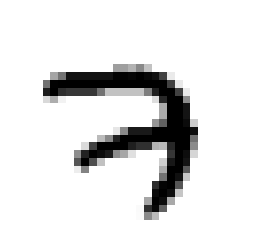

In [8]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
some_digit = X_train[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

In [9]:
feature_cols = [tf.feature_column.numeric_column("X", shape=[28 * 28])]
dnn_clf = tf.estimator.DNNClassifier(hidden_units=[300,100], n_classes=10,
                                     feature_columns=feature_cols)

input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_train}, y=y_train, num_epochs=40, batch_size=50, shuffle=True)
dnn_clf.train(input_fn=input_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\efy\\AppData\\Local\\Temp\\tmppkrgaaj7', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000180FF515BA8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\efy\AppData

INFO:tensorflow:loss = 2.2516, step = 7301 (0.199 sec)
INFO:tensorflow:global_step/sec: 504.593
INFO:tensorflow:loss = 0.752921, step = 7401 (0.197 sec)
INFO:tensorflow:global_step/sec: 534.274
INFO:tensorflow:loss = 1.72886, step = 7501 (0.187 sec)
INFO:tensorflow:global_step/sec: 528.62
INFO:tensorflow:loss = 0.107655, step = 7601 (0.189 sec)
INFO:tensorflow:global_step/sec: 542.984
INFO:tensorflow:loss = 2.68822, step = 7701 (0.184 sec)
INFO:tensorflow:global_step/sec: 545.952
INFO:tensorflow:loss = 0.0755114, step = 7801 (0.183 sec)
INFO:tensorflow:global_step/sec: 551.985
INFO:tensorflow:loss = 0.793515, step = 7901 (0.181 sec)
INFO:tensorflow:global_step/sec: 540.048
INFO:tensorflow:loss = 0.281915, step = 8001 (0.185 sec)
INFO:tensorflow:global_step/sec: 548.952
INFO:tensorflow:loss = 0.0955018, step = 8101 (0.182 sec)
INFO:tensorflow:global_step/sec: 545.953
INFO:tensorflow:loss = 0.535515, step = 8201 (0.183 sec)
INFO:tensorflow:global_step/sec: 540.049
INFO:tensorflow:loss = 

INFO:tensorflow:global_step/sec: 525.837
INFO:tensorflow:loss = 0.156252, step = 15701 (0.190 sec)
INFO:tensorflow:global_step/sec: 537.189
INFO:tensorflow:loss = 0.053837, step = 15801 (0.186 sec)
INFO:tensorflow:global_step/sec: 523.085
INFO:tensorflow:loss = 0.0314271, step = 15901 (0.191 sec)
INFO:tensorflow:global_step/sec: 513
INFO:tensorflow:loss = 0.026101, step = 16001 (0.195 sec)
INFO:tensorflow:global_step/sec: 552.751
INFO:tensorflow:loss = 0.545859, step = 16101 (0.181 sec)
INFO:tensorflow:global_step/sec: 552.776
INFO:tensorflow:loss = 4.92352, step = 16201 (0.181 sec)
INFO:tensorflow:global_step/sec: 551.985
INFO:tensorflow:loss = 0.0624483, step = 16301 (0.181 sec)
INFO:tensorflow:global_step/sec: 555.051
INFO:tensorflow:loss = 0.0404574, step = 16401 (0.180 sec)
INFO:tensorflow:global_step/sec: 555.041
INFO:tensorflow:loss = 0.108121, step = 16501 (0.180 sec)
INFO:tensorflow:global_step/sec: 552.014
INFO:tensorflow:loss = 0.0446755, step = 16601 (0.181 sec)
INFO:tensor

INFO:tensorflow:loss = 0.0372186, step = 23901 (0.204 sec)
INFO:tensorflow:global_step/sec: 512.352
INFO:tensorflow:loss = 0.0436782, step = 24001 (0.195 sec)
INFO:tensorflow:global_step/sec: 528.617
INFO:tensorflow:loss = 0.055434, step = 24101 (0.189 sec)
INFO:tensorflow:global_step/sec: 534.28
INFO:tensorflow:loss = 0.0126066, step = 24201 (0.187 sec)
INFO:tensorflow:global_step/sec: 528.616
INFO:tensorflow:loss = 0.0158134, step = 24301 (0.189 sec)
INFO:tensorflow:global_step/sec: 531.431
INFO:tensorflow:loss = 0.0202102, step = 24401 (0.188 sec)
INFO:tensorflow:global_step/sec: 528.624
INFO:tensorflow:loss = 0.0478073, step = 24501 (0.189 sec)
INFO:tensorflow:global_step/sec: 509.74
INFO:tensorflow:loss = 0.0653096, step = 24601 (0.196 sec)
INFO:tensorflow:global_step/sec: 525.838
INFO:tensorflow:loss = 0.012394, step = 24701 (0.189 sec)
INFO:tensorflow:global_step/sec: 558.152
INFO:tensorflow:loss = 0.0402994, step = 24801 (0.180 sec)
INFO:tensorflow:global_step/sec: 555.05
INFO:

INFO:tensorflow:loss = 0.0274525, step = 32101 (0.183 sec)
INFO:tensorflow:global_step/sec: 537.147
INFO:tensorflow:loss = 0.0183046, step = 32201 (0.187 sec)
INFO:tensorflow:global_step/sec: 528.621
INFO:tensorflow:loss = 0.00617448, step = 32301 (0.188 sec)
INFO:tensorflow:global_step/sec: 523.085
INFO:tensorflow:loss = 0.0320307, step = 32401 (0.191 sec)
INFO:tensorflow:global_step/sec: 517.662
INFO:tensorflow:loss = 0.0284728, step = 32501 (0.193 sec)
INFO:tensorflow:global_step/sec: 512.353
INFO:tensorflow:loss = 0.0168855, step = 32601 (0.195 sec)
INFO:tensorflow:global_step/sec: 507.154
INFO:tensorflow:loss = 0.00349318, step = 32701 (0.197 sec)
INFO:tensorflow:global_step/sec: 537.149
INFO:tensorflow:loss = 0.0172246, step = 32801 (0.186 sec)
INFO:tensorflow:global_step/sec: 525.835
INFO:tensorflow:loss = 0.0193711, step = 32901 (0.190 sec)
INFO:tensorflow:global_step/sec: 540.049
INFO:tensorflow:loss = 0.0366734, step = 33001 (0.185 sec)
INFO:tensorflow:global_step/sec: 534.27

INFO:tensorflow:loss = 0.00716505, step = 40301 (0.183 sec)
INFO:tensorflow:global_step/sec: 551.984
INFO:tensorflow:loss = 0.00322068, step = 40401 (0.181 sec)
INFO:tensorflow:global_step/sec: 555.053
INFO:tensorflow:loss = 0.00128298, step = 40501 (0.180 sec)
INFO:tensorflow:global_step/sec: 548.952
INFO:tensorflow:loss = 0.00454242, step = 40601 (0.182 sec)
INFO:tensorflow:global_step/sec: 548.953
INFO:tensorflow:loss = 0.0244024, step = 40701 (0.182 sec)
INFO:tensorflow:global_step/sec: 545.944
INFO:tensorflow:loss = 0.000592754, step = 40801 (0.183 sec)
INFO:tensorflow:global_step/sec: 551.99
INFO:tensorflow:loss = 0.015235, step = 40901 (0.181 sec)
INFO:tensorflow:global_step/sec: 540.05
INFO:tensorflow:loss = 0.0187971, step = 41001 (0.185 sec)
INFO:tensorflow:global_step/sec: 520.357
INFO:tensorflow:loss = 0.0161263, step = 41101 (0.192 sec)
INFO:tensorflow:global_step/sec: 514.998
INFO:tensorflow:loss = 0.0311968, step = 41201 (0.194 sec)
INFO:tensorflow:global_step/sec: 520.3

In [10]:
test_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_test}, y=y_test, shuffle=False)
eval_results = dnn_clf.evaluate(input_fn=test_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-06-29-14:57:12
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\efy\AppData\Local\Temp\tmppkrgaaj7\model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-06-29-14:57:12
INFO:tensorflow:Saving dict for global step 44000: accuracy = 0.9795, average_loss = 0.099547, global_step = 44000, loss = 12.6009


In [11]:
eval_results

{'accuracy': 0.9795,
 'average_loss': 0.099546969,
 'global_step': 44000,
 'loss': 12.600883}

In [12]:
y_pred_iter = dnn_clf.predict(input_fn=test_input_fn)
y_pred = list(y_pred_iter)
y_pred[0]

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\efy\AppData\Local\Temp\tmppkrgaaj7\model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


{'class_ids': array([7], dtype=int64),
 'classes': array([b'7'], dtype=object),
 'logits': array([ -5.04987764,  -8.29570198, -10.15275764,   2.62587905,
         -7.21308756,  -7.2333045 , -18.54790306,  15.78948307,
         -4.3892622 ,   7.17388153], dtype=float32),
 'probabilities': array([  8.90227336e-10,   3.46622800e-11,   5.41187884e-12,
          1.91884556e-06,   1.02336556e-10,   1.00288493e-10,
          1.22287692e-15,   9.99816954e-01,   1.72346626e-09,
          1.81222567e-04], dtype=float32)}

In [13]:
def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = tf.compat.as_bytes("<stripped %d bytes>"%size)
    return strip_def
  
def rename_nodes(graph_def, rename_func):
    res_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = res_def.node.add() 
        n.MergeFrom(n0)
        n.name = rename_func(n.name)
        for i, s in enumerate(n.input):
            n.input[i] = rename_func(s) if s[0]!='^' else '^'+rename_func(s[1:])
    return res_def
  
def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))
  
    iframe = """
        <iframe seamless style="width:800px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

In [14]:
n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [15]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

In [16]:
def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 2 / np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        W = tf.Variable(init, name="kernel")
        b = tf.Variable(tf.zeros([n_neurons]), name="bias")
        Z = tf.matmul(X, W) + b
        if activation is not None:
            return activation(Z)
        else:
            return Z

In [17]:
with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden1, name="hidden1",
                           activation=tf.nn.relu)
    hidden2 = neuron_layer(hidden1, n_hidden2, name="hidden2",
                           activation=tf.nn.relu)
    logits = neuron_layer(hidden2, n_outputs, name="outputs")

In [18]:
# without de neuron_layer coz we have similar tf.layers.dense
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",
                           activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",
                           activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

In [19]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                              logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [20]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [21]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [22]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [23]:
n_epochs = 40
batch_size = 50

In [24]:
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

In [25]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_val = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "Batch accuracy:", acc_batch, "Val accuracy:", acc_val)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Batch accuracy: 0.9 Val accuracy: 0.902
1 Batch accuracy: 0.92 Val accuracy: 0.9218
2 Batch accuracy: 0.92 Val accuracy: 0.9314
3 Batch accuracy: 0.9 Val accuracy: 0.9382
4 Batch accuracy: 0.96 Val accuracy: 0.944
5 Batch accuracy: 0.94 Val accuracy: 0.9484
6 Batch accuracy: 1.0 Val accuracy: 0.9524
7 Batch accuracy: 0.94 Val accuracy: 0.9576
8 Batch accuracy: 0.96 Val accuracy: 0.9604
9 Batch accuracy: 0.94 Val accuracy: 0.9628
10 Batch accuracy: 0.9 Val accuracy: 0.9638
11 Batch accuracy: 0.98 Val accuracy: 0.9654
12 Batch accuracy: 0.98 Val accuracy: 0.965
13 Batch accuracy: 0.98 Val accuracy: 0.9698
14 Batch accuracy: 1.0 Val accuracy: 0.9696
15 Batch accuracy: 0.92 Val accuracy: 0.9722
16 Batch accuracy: 1.0 Val accuracy: 0.973
17 Batch accuracy: 1.0 Val accuracy: 0.9722
18 Batch accuracy: 0.98 Val accuracy: 0.9726
19 Batch accuracy: 0.98 Val accuracy: 0.9728
20 Batch accuracy: 1.0 Val accuracy: 0.9746
21 Batch accuracy: 1.0 Val accuracy: 0.9742
22 Batch accuracy: 0.98 Val accur

In [26]:
with tf.Session() as sess:
    saver.restore(sess, "./my_model_final.ckpt") # or better, use save_path
    X_new_scaled = X_test[:20]
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred = np.argmax(Z, axis=1)

INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt


In [27]:
print("Predicted classes:", y_pred)
print("Actual classes:   ", y_test[:20])

Predicted classes: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
Actual classes:    [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [29]:
show_graph(tf.get_default_graph())